In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns

In [2]:
#201801のデータを読み込んでみる
df_f18 = pd.read_csv('ks-projects-201801.csv')
#最初の五行を表示してみる。
display(df_f18.head())

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [3]:
#統計値を表示してみる。
display(df_f18.describe())
#欠損値がある行数を数えてみる。
display(df_f18.isnull().sum())
#各列のデータタイプを確認してみる。
display(df_f18.dtypes)

ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.382635e+08  2.000000e+03  3.000000e+01       2.000000  1.698000e+01   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
75%    1.610149e+09  1.600000e+04  4.076000e+03      56.000000  3.034090e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  
count      3.786610e+05   3.786610e+05  
mean       9.058924e+03   4.545440e+04  
std        9.097334e+04   1.152950e+06  
min        0.000000e+00   1.000000e-02  
25%        3.100000e+01   2.000000e+03  
50%        6.243300e+02   5.500000e+03  
75%        4.050000e+03   1.550000e+04  
max        2.033899e+07   1.663614e+08

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [4]:
#１個でも欠損値がある行はとりあえず削除してみる。
df_f18_dna = df_f18.dropna(how='any')
#欠損値がある行数を数えてみる。
display(df_f18_dna.isnull().sum())

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [5]:
#stateの要素の個数を数えてみる。
df_f18_dna['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [6]:
#成功だけを抽出したDFと失敗だけを抽出したDF
df_f18_success = df_f18_dna[df_f18_dna['state']=='successful']
df_f18_failed =  df_f18_dna[df_f18_dna['state']=='failed']
#両方を結合
df_f18_SorF = pd.concat([df_f18_success,df_f18_failed])
#stateの要素の個数を数えてみる。
df_f18_SorF['state'].value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

In [7]:
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

#categoryに出てくるカテゴリを覚えて
#categoryを数値に変換
le = le.fit(df_f18_SorF['category'])
df_f18_SorF['category'] = le.transform(df_f18_SorF['category'])

#main_categoryに出てくるカテゴリを覚えて
#main_categoryを数値に変換
le = le.fit(df_f18_SorF['main_category'])
df_f18_SorF['main_category'] = le.transform(df_f18_SorF['main_category'])

#currencyに出てくるカテゴリを覚えて
#currencyを数値に変換
le = le.fit(df_f18_SorF['currency'])
df_f18_SorF['currency'] = le.transform(df_f18_SorF['currency'])

#stateに出てくるカテゴリを覚えて
#stateを数値に変換
le = le.fit(df_f18_SorF['state'])
df_f18_SorF['state'] = le.transform(df_f18_SorF['state'])

#countryに出てくるカテゴリを覚えて
#countryを数値に変換
le = le.fit(df_f18_SorF['country'])
df_f18_SorF['country'] = le.transform(df_f18_SorF['country'])

df_f18_SorF.head()

ID                                               name  category  \
5   1000014025                               Monarch Espresso Bar       123   
6   1000023410  Support Solar Roasted Coffee & Green Energy!  ...        58   
11   100005484                                   Lisa Lim New CD!        72   
14  1000057089  Tombstone: Old West tabletop game and miniatur...       136   
18  1000070642                Mike Corey's Darkness & Light Album        90   

    main_category  currency    deadline     goal             launched  \
5               7        13  2016-04-01  50000.0  2016-02-26 13:38:27   
6               7        13  2014-12-21   1000.0  2014-12-01 18:30:44   
11             10        13  2013-04-08  12500.0  2013-03-09 06:42:58   
14              8         5  2017-05-03   5000.0  2017-04-05 19:44:18   
18             10        13  2012-08-17    250.0  2012-08-02 14:11:32   

    pledged  state  backers  country  usd pledged  usd_pledged_real  \
5   52375.0      1      224       21     52375.00          52375.00   
6    1205.0      1       16       21      1205.00           1205.00   
11  12700.0      1      100       21     12700.00          12700.00   
14  94175.0      1      761        9     57763.78         121857.33   
18    250.0      1        7       21       250.00            250.00   

    usd_goal_real  
5        50000.00  
6         1000.00  
11       12500.00  
14        6469.73  
18         250.00

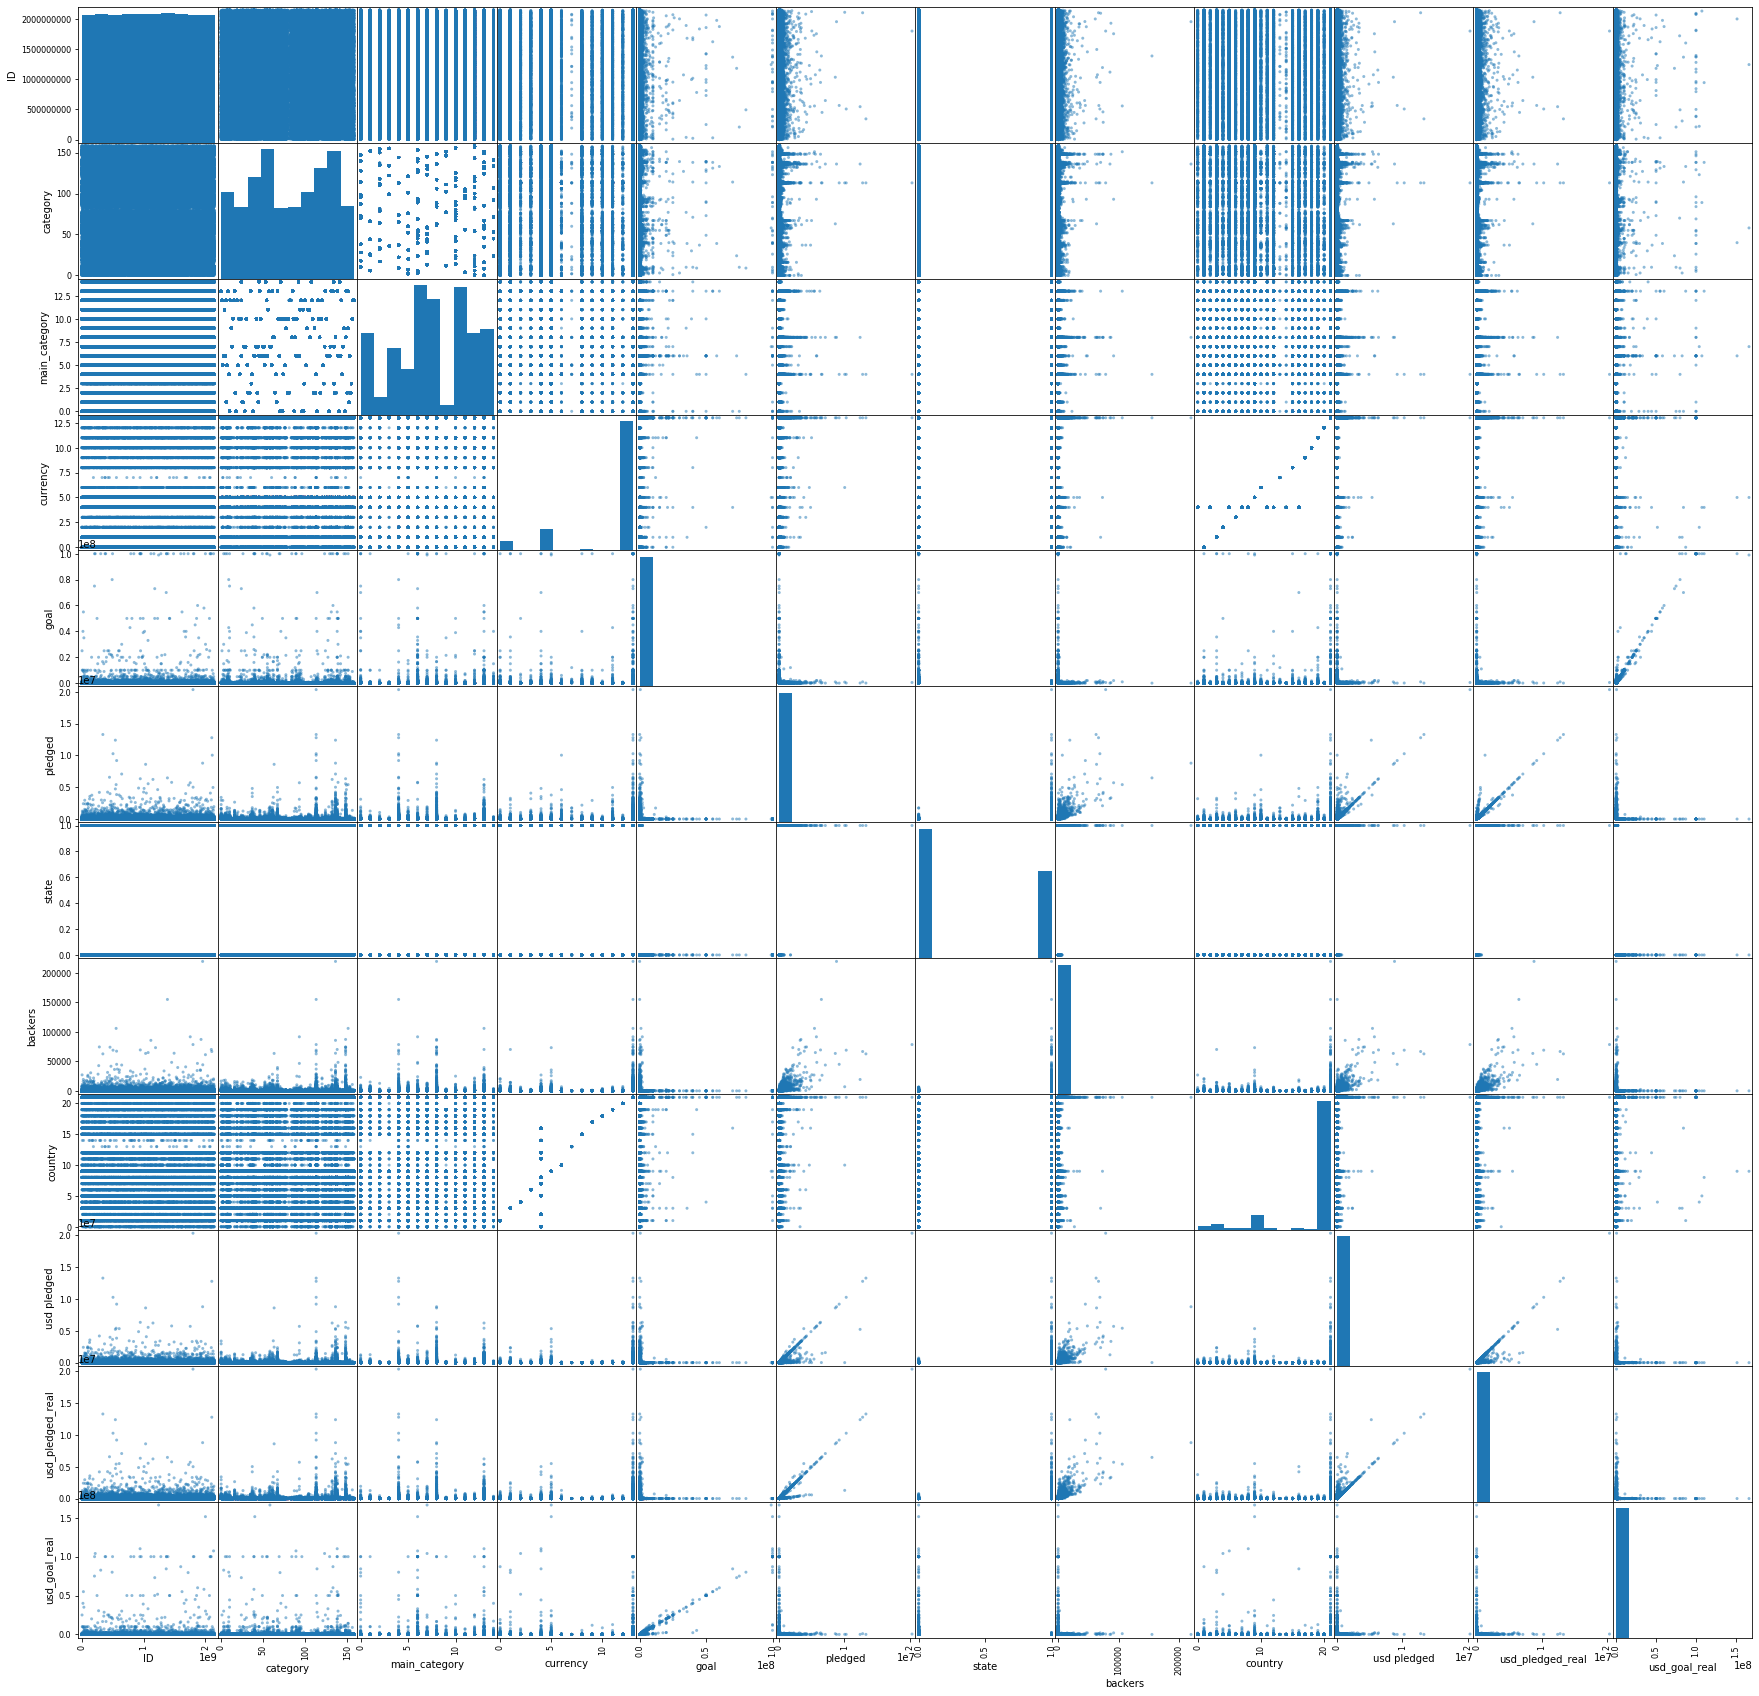

In [8]:
# まず、201801の散布図行列を書いてみる
pd.plotting.scatter_matrix(df_f18_SorF, figsize=(30,30))
plt.show()

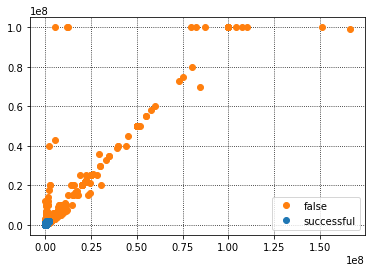

In [9]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれをプロットしてみる
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_f18_F["usd_goal_real"], df_f18_F["goal"], 'o', color='C1', label='false')
plt.plot(df_f18_S["usd_goal_real"], df_f18_S["goal"], 'o', color='C0', label='successful')
plt.legend(loc='best')
plt.show()

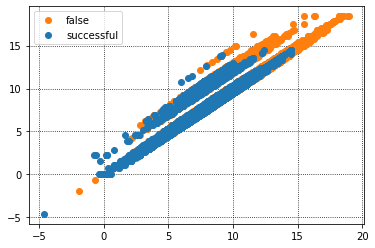

In [10]:
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_f18_F["usd_goal_real"]), np.log(df_f18_F["goal"]), 'o', color='C1', label='false')
plt.plot(np.log(df_f18_S["usd_goal_real"]), np.log(df_f18_S["goal"]), 'o', color='C0', label='successful')
plt.legend(loc='best')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

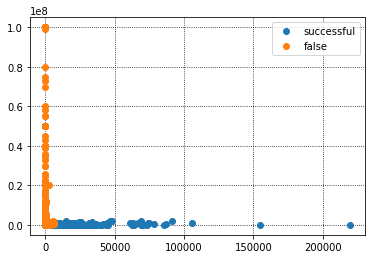

In [12]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれをプロットしてみる
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_f18_S["backers"], df_f18_S["goal"], 'o', color='C0', label='successful')
plt.plot(df_f18_F["backers"], df_f18_F["goal"], 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show

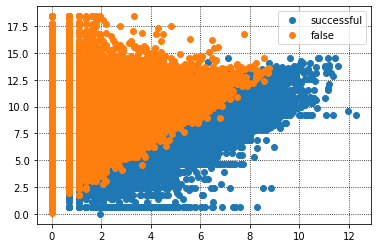

In [15]:
#Log(0)対策
delta=1

#「goal」、「backers」の対数の関係を見てみる。
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_f18_S["backers"]+delta), np.log(df_f18_S["goal"]+delta), 'o', color='C0', label='successful')
plt.plot(np.log(df_f18_F["backers"]+delta), np.log(df_f18_F["goal"]+delta), 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show()

In [16]:
#目的変数'state'を正解としてyに格納
y = df_f18_SorF['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_f18_SorF[['goal', 'backers']].values

#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp))) 

5172 30727
166884 128679
Accuracy  = 89.169%
Recall    = 96.136%
Precision = 80.724%


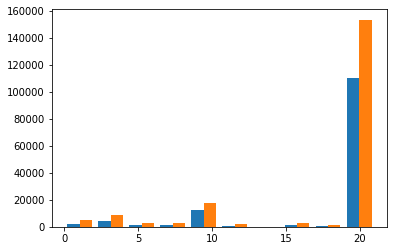

In [18]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれを'country'についてヒストグラムを書いてみる
plt.hist([df_f18_S["country"], df_f18_F["country"]], stacked=False)
plt.show() 

country  country_rate
0         0      0.220619
1         1      0.303809
2         2      0.290631
3         3      0.334196
4         4      0.286810
5         5      0.272701
6         6      0.388769
7         7      0.262680
8         8      0.360317
9         9      0.409704
10       10      0.452830
11       11      0.303075
12       12      0.185310
13       13      0.304348
14       14      0.333333
15       15      0.280652
16       16      0.255910
17       17      0.278351
18       18      0.351648
19       19      0.337309
20       20      0.392070
21       21      0.418196

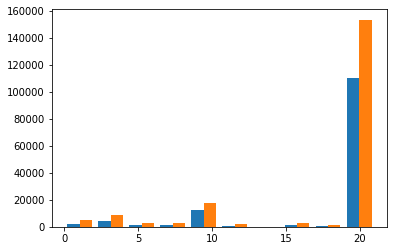

In [39]:
#'country'ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_ct = df_f18_SorF.groupby('country',as_index=False)
df_f18_gb_ct_mn = df_f18_gb_ct.mean()

#'state'は成功が'1',失敗が'0'なので、'country'毎の'state'の平均は
#その国の成功する割合（確率）と等価なので名称変更
df_f18_gb_ct_mn = df_f18_gb_ct_mn.rename(columns={'state': 'country_rate'}) 
display(df_f18_gb_ct_mn[['country','country_rate']])

#元のデータフレームに、国ごとの成功する確率を結合
df_f18_SorF = pd.merge(df_f18_SorF, df_f18_gb_ct_mn[['country','country_rate']], on='country')
plt.hist([df_f18_S["country"], df_f18_F["country"]], stacked=False)
plt.show() 

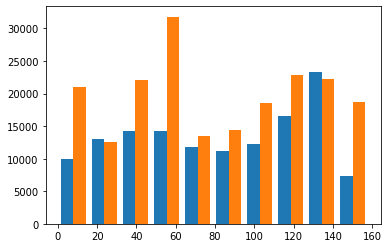

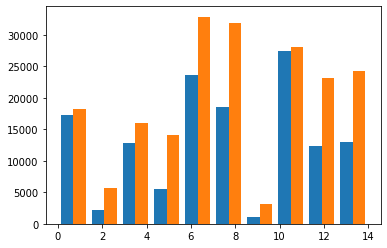

In [20]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれについてヒストグラムを書いてみる
plt.hist([df_f18_S["category"], df_f18_F["category"]], stacked=False)
plt.show()

plt.hist([df_f18_S["main_category"], df_f18_F["main_category"]], stacked=False)
plt.show() 

In [35]:
#"main_category"ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_mc = df_f18_SorF.groupby("main_category",as_index=False)
df_f18_gb_mc_mn = df_f18_gb_mc.mean()

#'state'は成功が'1',失敗が'0'なので、'main_category'毎の'state'の平均は
#そのメインカテゴリーの成功する割合（確率）と等価なので名称変更
df_f18_gb_mc_mn = df_f18_gb_mc_mn.rename(columns={'state': 'main_category_rate'}) 
display(df_f18_gb_mc_mn[['main_category','main_category_rate']])

#元のデータフレームに、カテゴリごとの成功する確率を結合
df_f18_SorF = pd.merge(df_f18_SRate, df_f18_gb_mc_mn[['main_category','main_category_rate']], on='main_category')

main_category  main_category_rate
0               0            0.448908
1               1            0.591415
2               2            0.270530
3               3            0.654352
4               4            0.415921
5               5            0.282846
6               6            0.417889
7               7            0.275914
8               8            0.438920
9               9            0.243973
10             10            0.526299
11             11            0.341108
12             12            0.347330
13             13            0.237854
14             14            0.637961

In [34]:
#"category"ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_cg = df_f18_SorF.groupby("category",as_index=False)
df_f18_gb_cg_mn = df_f18_gb_cg.mean()

#'state'は成功が'1',失敗が'0'なので、'category'毎の'state'の平均は
#そのカテゴリーの成功する割合（確率）と等価なので名称変更
df_f18_gb_cg_mn = df_f18_gb_cg_mn.rename(columns={'state': 'category_rate'}) 
display(df_f18_gb_cg_mn[['category','category_rate']])

#国別の成功率を追加したデータフレームに、カテゴリーごとの成功する確率を結合
df_f18_SorF = pd.merge(df_f18_SRate, df_f18_gb_cg_mn[['category','category_rate']], on='category')

category  category_rate
0           0       0.426056
1           1       0.241956
2           2       0.391606
3           3       0.172303
4           4       0.275109
..        ...            ...
154       154       0.275992
155       155       0.337838
156       156       0.475258
157       157       0.242254
158       158       0.504225

[159 rows x 2 columns]

In [29]:
# 'deadline' 'launched' の項目をdatetimeに変更
df_f18_SorF['deadline'] = pd.to_datetime(df_f18_SorF['deadline'], errors = 'coerce')
df_f18_SorF['launched'] = pd.to_datetime(df_f18_SorF['launched'], errors = 'coerce')
# 'deadline' 'launched' の間の期間を示す'period'を作成
df_f18_SorF['period'] = df_f18_SorF['deadline'] - df_f18_SorF['launched']
#'period'の日数を'days'に抽出
days = [] 
for i in df_f18_SorF.index:
    days.append(df_f18_SorF['period'][i].days)
#元のデータフレームに'days'の列を追加 
df_f18_SorF['days'] = days

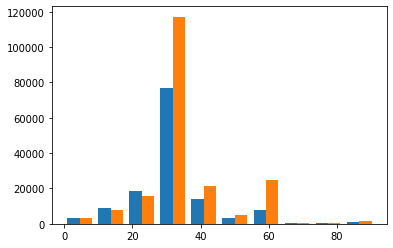

In [30]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれを'days'についてヒストグラムを書いてみる
plt.hist([df_f18_S['days'], df_f18_F['days']], stacked=False)
plt.show()

In [33]:
df_f18_SorF

ID                                               name  \
5       1000014025                               Monarch Espresso Bar   
6       1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
11       100005484                                   Lisa Lim New CD!   
14      1000057089  Tombstone: Old West tabletop game and miniatur...   
18      1000070642                Mike Corey's Darkness & Light Album   
...            ...                                                ...   
378654   999975836              Homemade fresh dog food, Cleveland OH   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

        category  main_category  currency   deadline     goal  \
5            123              7        13 2016-04-01  50000.0   
6             58              7        13 2014-12-21   1000.0   
11            72             10        13 2013-04-08  12500.0   
14           136              8         5 2017-05-03   5000.0   
18            90             10        13 2012-08-17    250.0   
...          ...            ...       ...        ...      ...   
378654       130              7        13 2017-04-19   6500.0   
378657        93              6        13 2011-07-19   1500.0   
378658        93              6        13 2010-08-16  15000.0   
378659       138             13        13 2016-02-13  15000.0   
378660        98              0        13 2011-08-16   2000.0   

                  launched  pledged  state  backers  country  usd pledged  \
5      2016-02-26 13:38:27  52375.0      1      224       21     52375.00   
6      2014-12-01 18:30:44   1205.0      1       16       21      1205.00   
11     2013-03-09 06:42:58  12700.0      1      100       21     12700.00   
14     2017-04-05 19:44:18  94175.0      1      761        9     57763.78   
18     2012-08-02 14:11:32    250.0      1        7       21       250.00   
...                    ...      ...    ...      ...      ...          ...   
378654 2017-03-20 22:08:22    154.0      0        4       21         0.00   
378657 2011-06-22 03:35:14    155.0      0        5       21       155.00   
378658 2010-07-01 19:40:30     20.0      0        1       21        20.00   
378659 2016-01-13 18:13:53    200.0      0        6       21       200.00   
378660 2011-07-19 09:07:47    524.0      0       17       21       524.00   

        usd_pledged_real  usd_goal_real           period  days  
5               52375.00       50000.00 34 days 10:21:33    34  
6                1205.00        1000.00 19 days 05:29:16    19  
11              12700.00       12500.00 29 days 17:17:02    29  
14             121857.33        6469.73 27 days 04:15:42    27  
18                250.00         250.00 14 days 09:48:28    14  
...                  ...            ...              ...   ...  
378654            154.00        6500.00 29 days 01:51:38    29  
378657            155.00        1500.00 26 days 20:24:46    26  
378658             20.00       15000.00 45 days 04:19:30    45  
378659            200.00       15000.00 30 days 05:46:07    30  
378660            524.00        2000.00 27 days 14:52:13    27  

[331462 rows x 17 columns]

In [41]:
#********************************************************************
#.ロジスティック回帰で分類してみる。
#「goal」「backers」「days」「country_rate」
#「main_category_rate」「categoryrate」を説明変数とする。
#********************************************************************
#目的変数'state'を正解としてyに格納
y = df_f18_SorF['state'].values 
#説明変数'goal','backers'を入力としてXに格納 
X = df_f18_SorF[['goal', 'backers','days','country_rate','main_category_rate','category_rate']].values 

#ロジスティック回帰で学習 
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234) 
clf.fit(X, y) 

#******************************************************************** 
#.識別精度を確認する 
#　混同行列を作成し、Accuracy、Recall、Precisionを求める 
#******************************************************************** 
# 学習した結果を使って説明変数を入力して予測 
y_est = clf.predict(X) 
#混同行列を作成 
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel() 
print(fn, fp) 
print(tn, tp) 
#'Accuracy、Recall、Precisionを求めて表示 
print('Accuracy = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp))) 
print('Recall = {:.3f}%'.format(100 * (tp)/(fn+tp))) 
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

4784 34867
162744 129067
Accuracy = 88.038%
Recall = 96.426%
Precision = 78.731%
